# GWP 2

In [6]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numba import jit, njit

# Step 1

## Q1 :

### Pricing an ATM European call and put option using Black-Scholes





In [7]:
def BS_European_pricing(S, K, T, r, vol, option_type):
  #Calculating d1 & d2
  d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
  d2 = d1 - vol * np.sqrt(T)

  if option_type in ["C", "P"]:
      if option_type in ["C"]:
          Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
      else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
  else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

  return Opt_Price


In [8]:
# European Call option Price using BS
Opt_Price = BS_European_pricing(100, 100, 0.25, 0.05, 0.20, 'C')
print("Option price for call option= {:.2f}".format(Opt_Price))

Option price for call option= 4.61


In [9]:
# European Put option Price using BS
Opt_Price = BS_European_pricing(100, 100, 0.25, 0.05, 0.20, 'P')
print("Option price for Put option= {:.2f}".format(Opt_Price))

Option price for Put option= 3.37


### Calculating Delta for European call and put option using Black-Scholes at time 0

In [10]:
def BS_European_delta_pricing(S, K, T, r, vol, option_type):
  #Calculating d1 & d2
  d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
  d2 = d1 - vol * np.sqrt(T)

  if option_type in ["C", "P"]:
      if option_type in ["C"]:
          Delta = ss.norm.cdf(d1)
      else:
        Delta = -ss.norm.cdf(-d1)
  else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

  return Delta


In [11]:
# European Call delta using BS
Delta = BS_European_delta_pricing(100, 100, 0.25, 0.05, 0.20, 'C')
print("Delta for call option at time 0= {:.2f}".format(Delta))

Delta for call option at time 0= 0.57


In [12]:
# European Put delta using BS
Delta = BS_European_delta_pricing(100, 100, 0.25, 0.05, 0.20, 'P')
print("Delta for Put option at time 0= {:.2f}".format(Delta))

Delta for Put option at time 0= -0.43


### Calculating Vega for European call and put option using Black-Scholes at different volatilities

In [13]:
def BS_European_vega_pricing(S, K, T, r, vol, option_type):
  #Calculating d1 & d2
  d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
  d2 = d1 - vol * np.sqrt(T)

  if option_type in ["C", "P"]:
      if option_type in ["C"]:
        Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
      else:
        Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
        Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
  else:
    Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

  return Opt_Price, Vega

In [14]:
# European Call price & vega with 20% volatility
Opt_Price, Vega = BS_European_vega_pricing(100, 100, 0.25, 0.05, 0.20, 'C')
print("Option price for call option with 20% volatility= {:.2f}".format(Opt_Price))
print("Vega for call option with 20% volatility= {:.2f}".format(Vega))

print ('===============================================================')

# European Call price & vega with 25% volatility
Opt_Price, Vega = BS_European_vega_pricing(100, 100, 0.25, 0.05, 0.25, 'C')
print("Option price for call option with 25% volatility= {:.2f}".format(Opt_Price))
print("Vega for call option with 25% volatility= {:.2f}".format(Vega))

Option price for call option with 20% volatility= 4.61
Vega for call option with 20% volatility= 19.64
Option price for call option with 25% volatility= 5.60
Vega for call option with 25% volatility= 19.69


In [15]:
# European Put price & vega with 20% volatility
Opt_Price, Vega = BS_European_vega_pricing(100, 100, 0.25, 0.05, 0.20, 'P')
print("Option price for Put option with 20% volatility= {:.2f}".format(Opt_Price))
print("Vega for Put option with 20% volatility= {:.2f}".format(Vega))

print ('===============================================================')

# European Put price & vega with 25% volatility
Opt_Price, Vega = BS_European_vega_pricing(100, 100, 0.25, 0.05, 0.25, 'P')
print("Option price for Put option with 25% volatility= {:.2f}".format(Opt_Price))
print("Vega for Put option with 25% volatility= {:.2f}".format(Vega))

Option price for Put option with 20% volatility= 3.37
Vega for Put option with 20% volatility= 19.64
Option price for Put option with 25% volatility= 4.36
Vega for Put option with 25% volatility= 19.69


## Q2:

### Pricing an ATM European call and put options using MC methods

$ S_0 = 100; K=100; r = 5\%; σ = 20\%; $ T = 3 months

In [16]:
def eu_opt_mc(S, K, r, sigma, T, t, Opttype, Ite):
    data = np.zeros((Ite, 2))
    z = np.random.normal(0, 1, [1, Ite])
    ST = S * np.exp((T - t) * (r - 0.5 * sigma**2) + sigma * np.sqrt(T - t) * z)
    if Opttype == 'C':
      data[:, 1] = ST - K
    elif Opttype == 'P':
      data[:, 1] = K - ST
    else:
      raise Exception(f"Error, '{Opttype}' is wrong option type.")

    average = np.mean(np.amax(data, axis=1))

    return np.exp(-r * (T - t)) * average

In [17]:
np.random.seed(10)
params = [100, 100, 0.05, 0.2, 3/12, 0]
M = 15
mc_steps = [1000 * 2**i for i in range(M)]
eu_call_prices = [eu_opt_mc(*params, 'C', step) for step in mc_steps]
eu_put_prices = [eu_opt_mc(*params, 'P', step) for step in mc_steps]

In [18]:
mc_steps

[1000,
 2000,
 4000,
 8000,
 16000,
 32000,
 64000,
 128000,
 256000,
 512000,
 1024000,
 2048000,
 4096000,
 8192000,
 16384000]

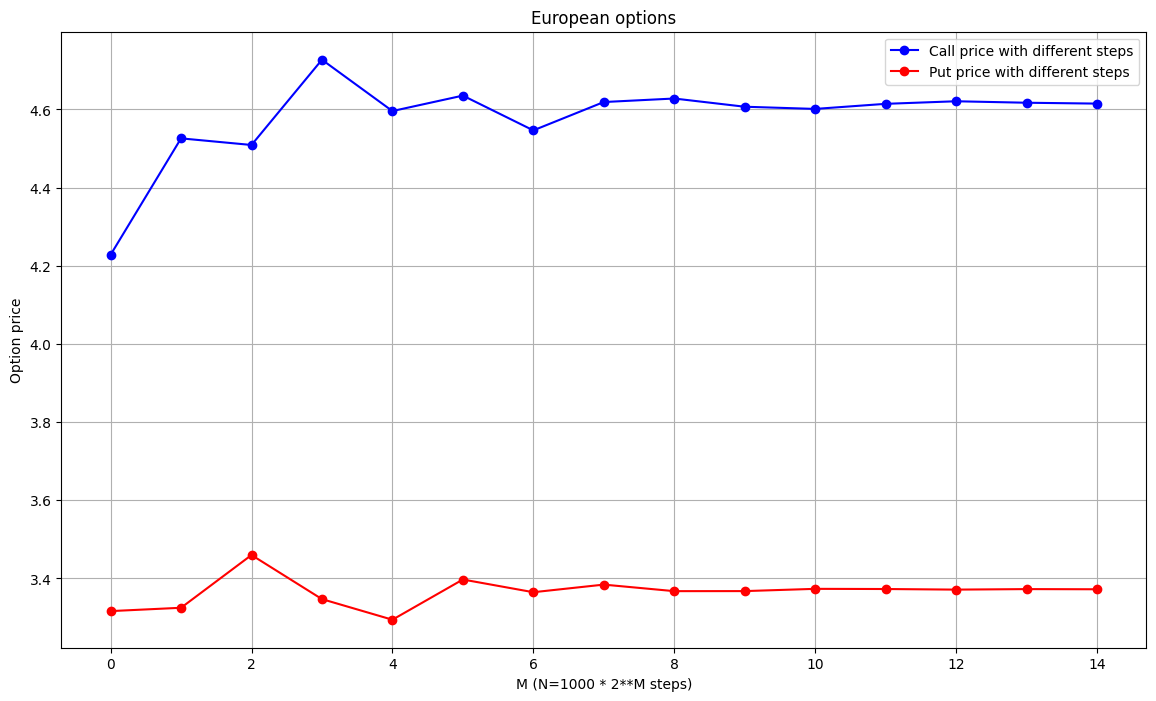

In [19]:
plt.figure(figsize=(14,8))
plt.plot(range(M), eu_call_prices, color='blue', label='Call price with different steps', marker='o')
plt.plot(range(M), eu_put_prices, color='red', label='Put price with different steps', marker='o')
plt.xlabel('M (N=1000 * 2**M steps)')
plt.ylabel('Option price')
plt.title('European options')
plt.legend()
plt.grid()

In [20]:
print("Monte Carlo Call Price:", np.round(eu_call_prices[-1], 2))
print("Monte Carlo Put Price:", np.round(eu_put_prices[-1], 2))

Monte Carlo Call Price: 4.61
Monte Carlo Put Price: 3.37


### Compute the Greek Delta for the European call and European put at time 0:

$ S_0 = 100; K=100; r = 5\%; σ = 20\%; $ T = 3 months

In [21]:
np.random.seed(10)
S1 = 100
S2 = S1 + 0.5
C1 = np.round(eu_opt_mc(*[S1, 100, 0.05, 0.2, 3/12, 0], 'C', 1000 * 2**14), 3)
C2 = np.round(eu_opt_mc(*[S2, 100, 0.05, 0.2, 3/12, 0], 'C', 1000 * 2**14), 3)
print("Monte Carlo Call Price for S0 = 100:", C1)
print("Monte Carlo Call Price for S0 = 100.5:", C2)
print("MC Delta for Call:", np.round((C2 - C1) / (S2 - S1), 3))

Monte Carlo Call Price for S0 = 100: 4.616
Monte Carlo Call Price for S0 = 100.5: 4.905
MC Delta for Call: 0.578


In [22]:
np.random.seed(10)
S1 = 100
S2 = S1 + 0.5
P1 = np.round(eu_opt_mc(*[S1, 100, 0.05, 0.2, 3/12, 0], 'P', 1000 * 2**14), 3)
P2 = np.round(eu_opt_mc(*[S2, 100, 0.05, 0.2, 3/12, 0], 'P', 1000 * 2**14), 3)
print("Monte Carlo Put Price for S0 = 100:", P1)
print("Monte Carlo Put Price for S0 = 100.5:", P2)
print("MC Delta for Put:", np.round((P2 - P1) / (S2 - S1), 3))

Monte Carlo Put Price for S0 = 100: 3.372
Monte Carlo Put Price for S0 = 100.5: 3.161
MC Delta for Put: -0.422


### Compute the Greek Vega for the European call and European put at time 0:
Compute the sensitivity of previous put and call option prices to a 5%
increase in volatility (from 20% to 25%):

$ S_0 = 100; K=100; r = 5\%; σ = 20\%; $ T = 3 months

In [23]:

sig1 = 0.2
sig2 = sig1 + 0.05
np.random.seed(10)
C1 = np.round(eu_opt_mc(*[100, 100, 0.05, sig1, 3/12, 0], 'C', 1000 * 2**14), 3)
np.random.seed(10)
C2 = np.round(eu_opt_mc(*[100, 100, 0.05, sig2, 3/12, 0], 'C', 1000 * 2**14), 3)
print("Monte Carlo Call Price for 20% volatility:", C1)
print("Monte Carlo Call Price for 25% volatility:", C2)
print("MC Vega for Call:", np.round((C2 - C1) / (sig2 - sig1), 3))

Monte Carlo Call Price for 20% volatility: 4.616
Monte Carlo Call Price for 25% volatility: 5.6
MC Vega for Call: 19.68


In [24]:
sig1 = 0.2
sig2 = sig1 + 0.05
np.random.seed(10)
P1 = np.round(eu_opt_mc(*[100, 100, 0.05, sig1, 3/12, 0], 'P', 1000 * 2**14), 3)
np.random.seed(10)
P2 = np.round(eu_opt_mc(*[100, 100, 0.05, sig2, 3/12, 0], 'P', 1000 * 2**14), 3)
print("Monte Carlo Call Price for 20% volatility:", P1)
print("Monte Carlo Call Price for 25% volatility:", P2)
print("MC Vega for Call:", np.round((P2 - P1) / (sig2 - sig1), 3))

Monte Carlo Call Price for 20% volatility: 3.372
Monte Carlo Call Price for 25% volatility: 4.355
MC Vega for Call: 19.66


# Step 2

## Q4 :

### American Call Option pricing using Monte-carlo methods with regular GBM process and daily simulation

In [25]:
def american_call_option_mc(S0: float, K: float, r: float, sigma: float, T: float, N: int, M: int):

  np.random.seed(5)

  # Time step
  dt = T / N
  discount_factor = np.exp(-r * dt)

  # Simulate stock price paths
  S = np.zeros((M, N+1))
  S[:, 0] = S0

  # Generate price paths
  for t in range(1, N+1):
      Z = np.random.standard_normal(M)  # standard normal random variables
      S[:, t] = S[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)

  # Calculate option payoffs at maturity
  payoff = np.maximum(S - K, 0)

  # Backward induction for American option pricing
  option_values = payoff[:, -1]


  for t in range(N - 1, 0, -1):
    # Discounted expected continuation value
    continuation_values = discount_factor * option_values
    # Check early exercise condition
    option_values = np.maximum(payoff[:, t], continuation_values)


  # Discount payoffs back to present value
  option_price = np.mean(option_values) * np.exp(-r * T)

  return option_price

In [26]:
# Parameters
S0 = 100  # initial stock price
K = 100   # strike price
T = 0.25     # time to maturity (1 year)
r = 0.05  # risk-free rate
sigma = 0.20  # volatility
N = 63  # number of time steps (daily)
M = 1000 * 2**9  # number of simulations

option_price = american_call_option_mc(S0, K, r, sigma, T, N, M)

print(f"American Call Option Price: {option_price:.2f}")

American Call Option Price: 7.99


### Delta for ATM American call using MC methods

In [27]:
S1 = 100
S2 = S1 + 0.5
np.random.seed(10)
C1 = np.round(american_call_option_mc(S1, 100, 0.05, 0.2, 3/12, 63, 1000 * 2**9), 3)
np.random.seed(10)
C2 = np.round(american_call_option_mc(S2, 100, 0.05, 0.2, 3/12, 63, 1000 * 2**9), 3)
print("Monte Carlo call Price for S0 = 100:", C1)
print("Monte Carlo call Price for S0 = 100.5:", C2)
print("MC Delta for call:", np.round((C2 - C1) / (S2 - S1), 3))

Monte Carlo call Price for S0 = 100: 7.994
Monte Carlo call Price for S0 = 100.5: 8.499
MC Delta for call: 1.01


### Vega for ATM American call using MC methods

In [28]:
vol1 = 0.2
vol2 = vol1 + 0.05
np.random.seed(10)
C1 = np.round(american_call_option_mc(*[100, 100, 0.05, vol1, 3/12, 63],  1000 * 2**9), 3)
np.random.seed(10)
C2 = np.round(american_call_option_mc(*[100, 100, 0.05, vol2, 3/12, 63],  1000 * 2**9), 3)
print("Monte Carlo call Price for S0 = 100:", C1)
print("Monte Carlo call Price for S0 = 100.5:", C2)
print("MC Vega for call:", np.round((C2 - C1) / (vol2 - vol1), 3))

Monte Carlo call Price for S0 = 100: 7.994
Monte Carlo call Price for S0 = 100.5: 9.891
MC Vega for call: 37.94


## Q5:

### American Put Option pricing using Monte-carlo methods with regular GBM process and daily simulation

In [29]:
@njit
def american_option_mc(S: float, K: float, r: float, sigma: float, T: float, num_steps: int, Opttype: str, N: int):

    dt = T / num_steps
    discount_factor = np.exp(-r * dt)

    # Initialize price paths
    price_paths = np.zeros((N, num_steps + 1))
    price_paths[:, 0] = S

    # Generate price paths
    for t in range(1, num_steps + 1):
        z = np.random.standard_normal(N)
        price_paths[:, t] = price_paths[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    # Initialize payoff matrix
    if Opttype == 'C':
      payoffs = np.maximum(price_paths - K, 0)
    elif Opttype == 'P':
      payoffs = np.maximum(K - price_paths, 0)
    else:
      print(f"Error, '{Opttype}' is wrong option type.")

    # Backward induction for American option pricing
    option_values = payoffs[:, -1]

    for t in range(num_steps - 1, -1, -1):
        # Discounted expected continuation value
        continuation_values = discount_factor * option_values
        # Check early exercise condition
        option_values = np.maximum(payoffs[:, t], continuation_values)

    # Discount the option value at the initial time
    option_value = np.mean(option_values)

    return option_value

In [30]:
# parameters
S = 100        # Current stock price
K = 100        # Strike price
r = 0.05       # Risk-free rate (1%)
sigma = 0.2    # Volatility
T = 3 / 12     # Time to expiration (3 months)
n_steps = 63 # T * 255
num_sim = 10000
opttype='P'

# Calculate the option price
option_price = american_option_mc(S, K, r, sigma, T, n_steps, opttype, num_sim)
print(f"The estimated price of the American {opttype} option is: {option_price:.2f}")

The estimated price of the American P option is: 6.45


In [31]:
%%time
params = [100, 100, 0.05, 0.2, 3/12, 63]
M = 11
mc_steps = [1000 * 2**i for i in range(M)]
np.random.seed(1)
am_put_prices = [american_option_mc(*params, 'P', step) for step in mc_steps]

CPU times: user 16.6 s, sys: 2.14 s, total: 18.8 s
Wall time: 18.8 s


In [32]:
mc_steps

[1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000, 256000, 512000, 1024000]

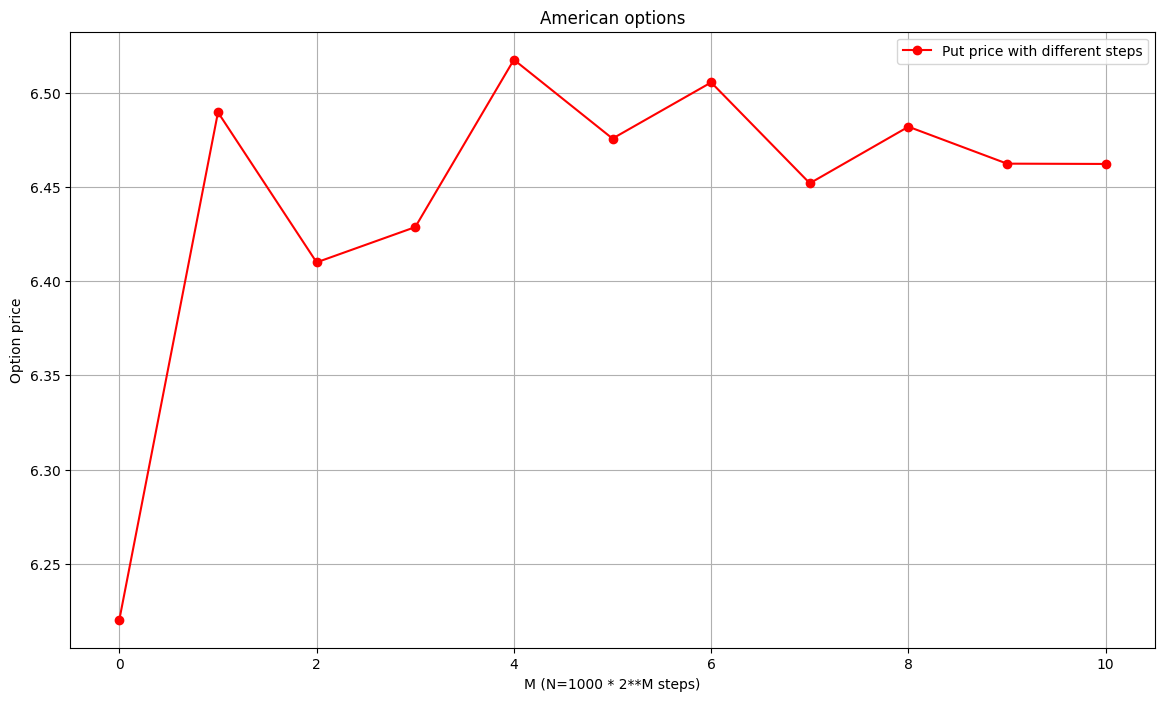

In [33]:
plt.figure(figsize=(14,8))
plt.plot(range(M), am_put_prices, color='red', label='Put price with different steps', marker='o')
plt.xlabel('M (N=1000 * 2**M steps)')
plt.ylabel('Option price')
plt.title('American options')
plt.legend()
plt.grid()

In [34]:
am_put_prices[-1]

6.46212047244384

### Delta for ATM American put using MC methods

In [35]:
S1 = 100
S2 = S1 + 0.5
np.random.seed(10)
P1 = np.round(american_option_mc(*[S1, 100, 0.05, 0.2, 3/12, 63], 'P', 1000 * 2**9), 3)
np.random.seed(10)
P2 = np.round(american_option_mc(*[S2, 100, 0.05, 0.2, 3/12, 63], 'P', 1000 * 2**9), 3)
print("Monte Carlo Put Price for S0 = 100:", P1)
print("Monte Carlo Put Price for S0 = 100.5:", P2)
print("MC Delta for Put:", np.round((P2 - P1) / (S2 - S1), 3))

Monte Carlo Put Price for S0 = 100: 6.462
Monte Carlo Put Price for S0 = 100.5: 6.046
MC Delta for Put: -0.832


### Vega for ATM American put using MC methods

In [36]:
sig1 = 0.2
sig2 = sig1 + 0.05
np.random.seed(10)
P1 = np.round(american_option_mc(*[100, 100, 0.05, sig1, 3/12, 63], 'P', 1000 * 2**9), 3)
np.random.seed(10)
P2 = np.round(american_option_mc(*[100, 100, 0.05, sig2, 3/12, 63], 'P', 1000 * 2**9), 3)
print("Monte Carlo Put Price for S0 = 100:", P1)
print("Monte Carlo Put Price for S0 = 100.5:", P2)
print("MC Vega for Put:", np.round((P2 - P1) / (sig2 - sig1), 3))

Monte Carlo Put Price for S0 = 100: 6.469
Monte Carlo Put Price for S0 = 100.5: 8.179
MC Vega for Put: 34.2


## Q6:

In [62]:

# Input data
S0 = 100  # Initial stock price
r = 0.05  # Risk-free rate
sigma = 0.2  # Volatility
T = 3/12  # Time to maturity (3 months)
K_values = [110, 105, 100, 95, 90]  # Strike prices
strike_prices = {110: 'Deep OTM: ', 105: 'OTM: ', 100: 'ATM: ', 95: 'ITM: ', 90: 'Deep ITM: '}
N = 63  # Number of time steps (daily)
M = 100000  # Number of simulations

dt = T / N  # Time step

# Function to simulate stock price paths
def simulate_stock_paths(S0, r, sigma, T, N, M):
    dt = T / N
    Z = np.random.standard_normal((N, M))
    S = np.zeros((N + 1, M))
    S[0] = S0
    for t in range(1, N + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * np.sqrt(dt) * Z[t - 1])
    return S

# Function to price American Call and Put options using Monte Carlo
def price_american_option(S0, K, r, sigma, T, N, M, option_type='call'):
    S = simulate_stock_paths(S0, r, sigma, T, N, M)
    payoff = np.maximum(S - K if option_type == 'call' else K - S, 0)
    option_price = np.zeros(M)

    for i in range(M):
        intrinsic_value = payoff[:, i]
        option_value = np.zeros(N + 1)
        option_value[-1] = intrinsic_value[-1]
        for t in range(N - 1, -1, -1):
            continuation_value = np.exp(-r * dt) * option_value[t + 1]
            option_value[t] = np.maximum(intrinsic_value[t], continuation_value)
        option_price[i] = option_value[0]

    return np.mean(option_price) * np.exp(-r * T)

# Calculate prices for American Call and Put options
for K in K_values:
    call_price = price_american_option(S0, K, r, sigma, T, N, M, option_type='call')
    put_price = price_american_option(S0, K, r, sigma, T, N, M, option_type='put')
    print(f"Strike Price: {strike_prices[K]} {K}")
    print(f"American Call Price: {call_price:.2f}")
    print(f"American Put Price: {put_price:.2f}")
    print()


Strike Price: Deep OTM:  110
American Call Price: 1.97
American Put Price: 16.21

Strike Price: OTM:  105
American Call Price: 4.24
American Put Price: 11.28

Strike Price: ATM:  100
American Call Price: 8.03
American Put Price: 6.38

Strike Price: ITM:  95
American Call Price: 12.89
American Put Price: 2.81

Strike Price: Deep ITM:  90
American Call Price: 17.83
American Put Price: 0.98



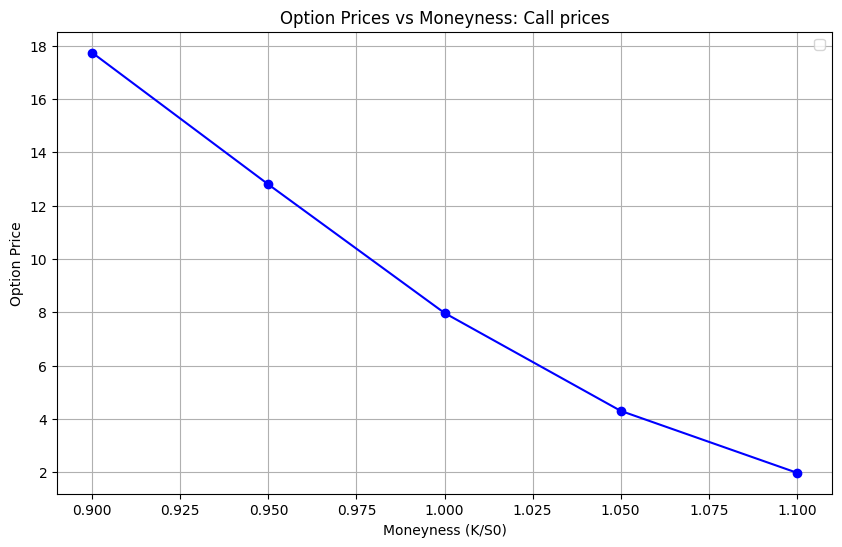

In [63]:


# Provided data
strike_prices = [110, 105, 100, 95, 90]
call_prices = [1.98, 4.30, 7.97, 12.79, 17.73]
put_prices = [16.27, 11.33, 6.35, 2.80, 0.98]

# Calculate moneyness (K/S0) where S0 = 100
S0 = 100
moneyness = [K / S0 for K in strike_prices]

# Plotting the relationship
plt.figure(figsize=(10, 6))

plt.plot(moneyness, call_prices, marker='o', linestyle='-', color='b')
# plt.plot(moneyness, put_prices, marker='o', linestyle='-', color='r', label='Put Prices')

plt.xlabel('Moneyness (K/S0)')
plt.ylabel('Option Price')
plt.title('Option Prices vs Moneyness: Call prices')
plt.legend()
plt.grid(True)

plt.show()


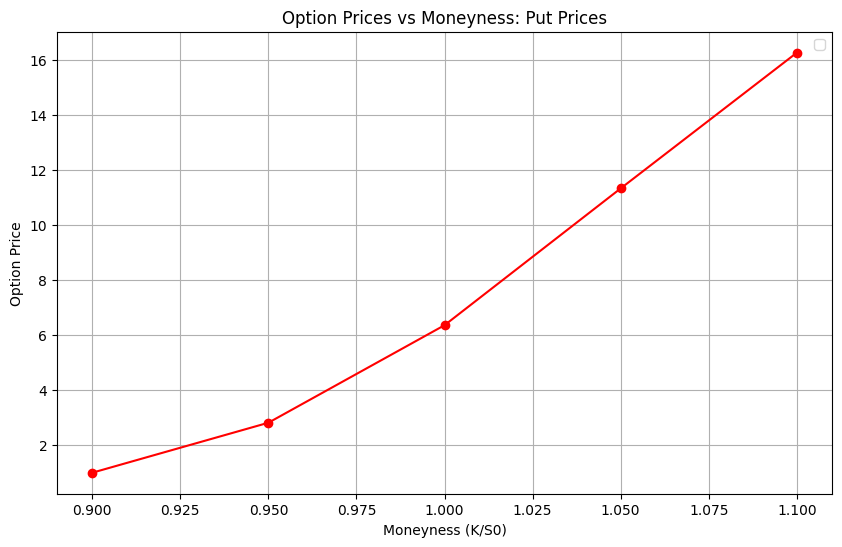

In [64]:
# Provided data
strike_prices = [110, 105, 100, 95, 90]
call_prices = [1.98, 4.30, 7.97, 12.79, 17.73]
put_prices = [16.27, 11.33, 6.35, 2.80, 0.98]

# Calculate moneyness (K/S0) where S0 = 100
S0 = 100
moneyness = [K / S0 for K in strike_prices]

# Plotting the relationship
plt.figure(figsize=(10, 6))

# plt.plot(moneyness, call_prices, marker='o', linestyle='-', color='b', label='Call Prices')
plt.plot(moneyness, put_prices, marker='o', linestyle='-', color='r')

plt.xlabel('Moneyness (K/S0)')
plt.ylabel('Option Price')
plt.title('Option Prices vs Moneyness: Put Prices')
plt.legend()
plt.grid(True)

plt.show()


In [45]:
int(T * 255)

63

# Step 3

## Q7

### a. Pricing European call and Put option using 110% and 95% moneyness respectively

In [46]:
def BS_European_pricing_Q7(S, K, T, r, vol, option_type):
  #Calculating d1 & d2
  d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
  d2 = d1 - vol * np.sqrt(T)

  if option_type in ["C", "P"]:
      if option_type in ["C"]:
          Opt_Price_Q7 = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)


      else:
        Opt_Price_Q7 = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)


  else:
    return "Error: option type incorrect. Choose P for a put option or C for a call option."

  return Opt_Price_Q7


In [47]:
# European Call option Price using BS and 110% moneyness
Opt_Price_Q7 = BS_European_pricing_Q7(100, 110, 0.25, 0.05, 0.20, 'C')
print("Option price for call option with 110% moneyness = {:.2f}".format(Opt_Price_Q7))


Option price for call option with 110% moneyness = 1.19


In [48]:
# European Put option Price using BS and 95% moneyness
Opt_Price_Q7= BS_European_pricing_Q7(100, 95, 0.25, 0.05, 0.20, 'P')
print("Option price for Put option with 95% moneyness = {:.2f}".format(Opt_Price_Q7))


Option price for Put option with 95% moneyness = 1.53


### Calculating Deltas

In [49]:
def BS_European_pricing_delta(S, K, T, r, vol, option_type):
  #Calculating d1 & d2
  d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
  d2 = d1 - vol * np.sqrt(T)

  if option_type in ["C", "P"]:
      if option_type in ["C"]:
          Delta_Q7 = ss.norm.cdf(d1)

      else:
        Delta_Q7 = -ss.norm.cdf(-d1)

  else:
    return "Error: option type incorrect. Choose P for a put option or C for a call option."

  return Delta_Q7


In [50]:
# European Call delta using BS
Delta_Q7 = BS_European_pricing_delta(100, 110, 0.25, 0.05, 0.20, 'C')
Delta_C = Delta_Q7
print("Delta for call option at moneyness 110% = {:.2f}".format(Delta_Q7))


Delta for call option at moneyness 110% = 0.22


In [51]:
# European Put delta using BS
Delta_Q7 = BS_European_pricing_delta(100, 95, 0.25, 0.05, 0.20, 'P')
Delta_P = Delta_Q7
print("Delta for Put option at moneyness 95% = {:.2f}".format(Delta_Q7))

Delta for Put option at moneyness 95% = -0.25


### b. Delta of the buying portfolio

In [52]:
Portfolio1_delta = Delta_C + Delta_P
print(f"Portfolio delta : {Portfolio1_delta:.2f}")

Portfolio delta : -0.03


### c. Delta of the buying call and selling put portfolio

In [53]:
Portfolio2_delta = Delta_C - Delta_P
print(f"Portfolio delta : {Portfolio2_delta:.2f}")

Portfolio delta : 0.46


## Q8

### Monte-Carlo methods with daily time steps to price an Up-and-Out (UAO) barrier option.

The option is currently ATM with a barrier level of B=141 and:

$S_0 = 120; r = 6\%; σ = 30\%; T = 8$ months

In [54]:
def barier_opt(S: float, K: float, B: float, r: float, sigma: float, T: float, num_steps: int, N: int):

    dt = T / num_steps
    discount_factor = np.exp(-r * dt)

    # Initialize price paths
    price_paths = np.zeros((N, num_steps + 1))
    price_paths[:, 0] = S

    # Generate price paths
    for t in range(1, num_steps + 1):
        z = np.random.standard_normal(N)
        price_paths[:, t] = price_paths[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    # Up-and-Out (UAO) barrier call option
    condition = (np.max(price_paths, axis=1) - B < 0)
    price_paths_out = price_paths[condition, :]

    # Like call option:
    option_values = np.maximum(price_paths_out[:, -1] - K, 0)

    option_value = np.sum(option_values) / N * np.exp(-r * T)

    return option_value

In [55]:
%%time
params = [120, 120, 141, 0.06, 0.3, 8/12, 170]
M = 9
mc_steps = [1000 * 2**i for i in range(M)]
np.random.seed(10)
out_call_prices = [barier_opt(*params, step) for step in mc_steps]

CPU times: user 7.41 s, sys: 441 ms, total: 7.85 s
Wall time: 7.84 s


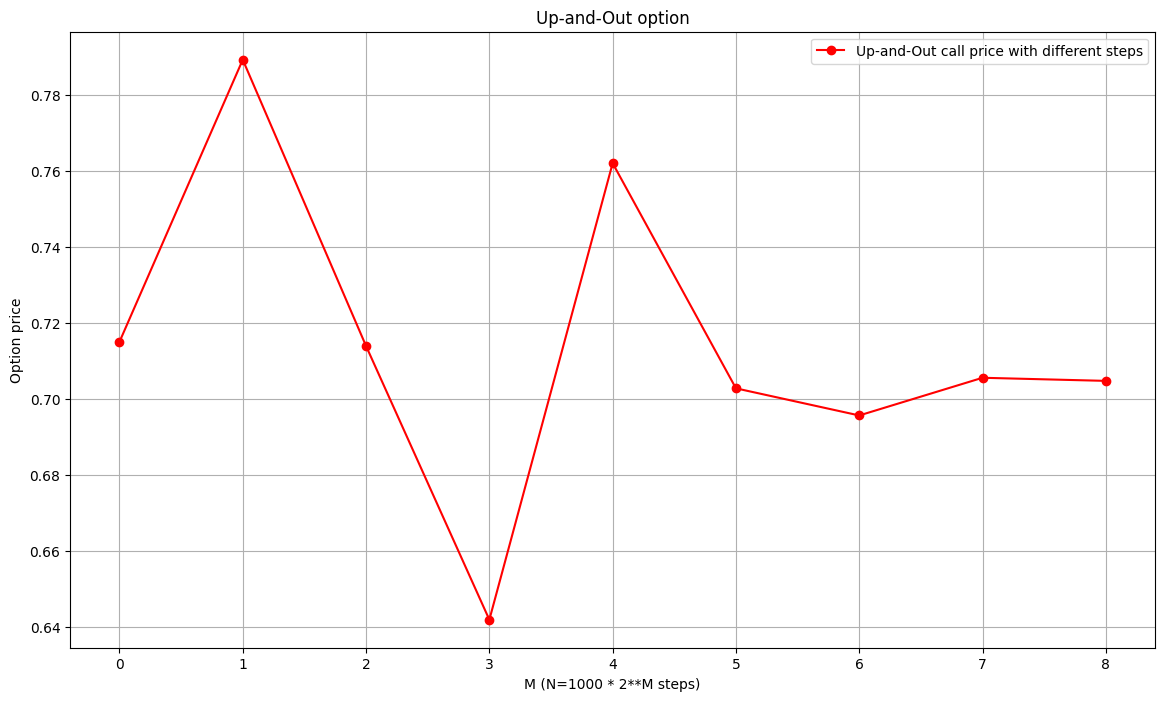

In [56]:
plt.figure(figsize=(14,8))
plt.plot(range(M), out_call_prices, color='red', label='Up-and-Out call price with different steps', marker='o')
plt.xlabel('M (N=1000 * 2**M steps)')
plt.ylabel('Option price')
plt.title('Up-and-Out option')
plt.legend()
plt.grid()

In [57]:
out_call_prices[-1]

0.7047612357416608

## Q9

a. Pricing of the Up and In Barrier option

In [58]:
def barrier_opt_uai(S, K, B, r, sigma, T, num_steps, N):
    dt = T / num_steps
    discount_factor = np.exp(-r * T)

    # Initialize price paths
    price_paths = np.zeros((N, num_steps + 1))
    price_paths[:, 0] = S

    # Generate price paths
    for t in range(1, num_steps + 1):
        z = np.random.standard_normal(N)
        price_paths[:, t] = price_paths[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    # Up-and-In (UAI) barrier call option
    condition = (np.max(price_paths, axis=1) >= B)
    price_paths_in = price_paths[condition, :]

    # Like call option:
    option_values = np.maximum(price_paths_in[:, -1] - K, 0)

    option_value = np.sum(option_values) / N * discount_factor

    return option_value

In [59]:
# Parameters
S0 = 120
K = 120
B = 141
r = 0.06
sigma = 0.30
T = 8/12
num_steps = 252
N = 10000

# Compute the price
uai_price = barrier_opt_uai(S0, K, B, r, sigma, T, num_steps, N)
print(f"Up-and-In Barrier Call Option Price: {uai_price:.2f}")

Up-and-In Barrier Call Option Price: 13.18


b. Pricing of the vanila option

In [60]:

def vanilla_call_option(S, K, r, sigma, T, num_steps, N):
    dt = T / num_steps
    discount_factor = np.exp(-r * T)

    # Initialize price paths
    price_paths = np.zeros((N, num_steps + 1))
    price_paths[:, 0] = S

    # Generate price paths
    for t in range(1, num_steps + 1):
        z = np.random.standard_normal(N)
        price_paths[:, t] = price_paths[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

    # Vanilla call option
    option_values = np.maximum(price_paths[:, -1] - K, 0)

    option_value = np.sum(option_values) / N * discount_factor

    return option_value

In [61]:
# Parameters
S0 = 120
K = 120
B = 141
r = 0.06
sigma = 0.30
T = 8/12
num_steps = 252
N = 10000

# Compute the price
vanilla_price = vanilla_call_option(S0, K, r, sigma, T, num_steps, N)

print(f"Vanilla Call Option Price: {vanilla_price:.2f}")

Vanilla Call Option Price: 14.23
